In [27]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
data = pd.read_csv("./titanic.csv", sep=",", index_col=0)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [77]:
statistic = pd.DataFrame(index=["mean", "std", "max", "min"], columns=["Survived", "Pclass", "Sex", "Age", "Fare"])
statistic.Survived = [data.Survived.mean(axis=0), data.Survived.std(axis=0), data.Survived.values.max(), data.Survived.values.min()]
statistic.Pclass = [data.Pclass.mean(axis=0), data.Pclass.std(axis=0), data.Pclass.values.max(), data.Pclass.values.min()]
statistic.Age = [data.Age.mean(axis=0), data.Age.std(axis=0), data.Age.max(), data.Age.min()]
statistic.Fare = [data.Fare.mean(axis=0), data.Fare.std(axis=0), data.Fare.max(), data.Fare.min()]
def sex_to_num(sex : str):
    if sex == "male":
        return 1
    elif sex == "female":
        return 0

sex = data.Sex.apply(sex_to_num)

statistic.Sex = [sex.mean(axis=0), sex.std(axis=0), sex.max(), sex.min()]
statistic

,Survived,Pclass,Sex,Age,Fare
mean,0.383838,2.308642,0.647587,29.699118,32.204208
std,0.486592,0.836071,0.477990,14.526497,49.693429
max,1.000000,3.000000,1.000000,80.000000,512.329200
min,0.000000,1.000000,0.000000,0.420000,0.000000


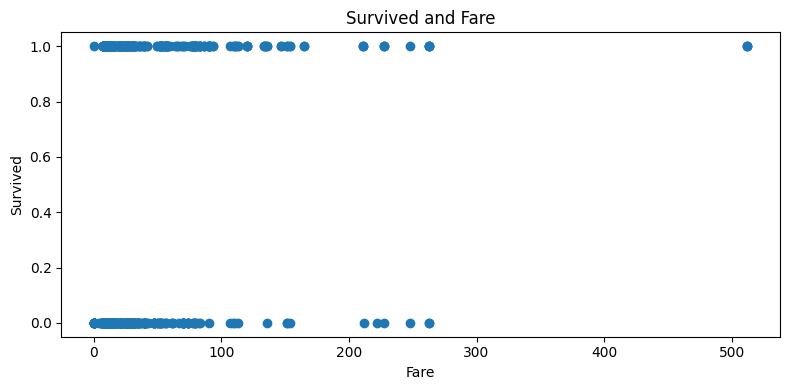

In [115]:
fig = plt.figure(figsize=(8,4))
plt.scatter(data.Fare, data.Survived)
plt.title("Survived and Fare")
plt.xlabel("Fare")
plt.ylabel("Survived")
plt.tight_layout()


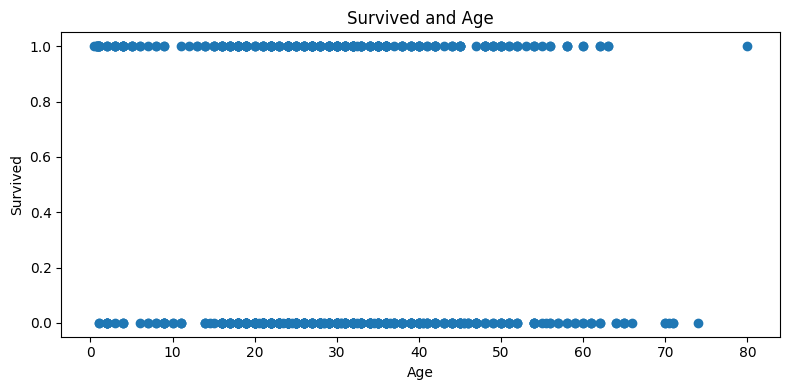

In [116]:
fig = plt.figure(figsize=(8,4))
plt.scatter(data.Age, data.Survived)
plt.title("Survived and Age")
plt.xlabel("Age")
plt.ylabel("Survived")
plt.tight_layout()

In [19]:
df1 = data[["Survived", "Sex"]]
selection1_m = df1.where(df1.Sex == "male").dropna().Survived.values.astype("int64")
selection1_f = df1.where(df1.Sex == "female").dropna().Survived.values.astype("int64")
df2 = data[["Survived", "Pclass"]]
selection2_c1 = df2.where(df2.Pclass == 1).dropna().Survived.values.astype("int64")
selection2_c2 = df2.where(df2.Pclass == 2).dropna().Survived.values.astype("int64")
selection2_c3 = df2.where(df2.Pclass == 3).dropna().Survived.values.astype("int64")

In [128]:
def getACI(selection, alpha):
    mean = np.mean(selection)
    std = np.std(selection)
    dist = np.random.normal(loc=0, scale=1, size=len(selection))
    left = mean - np.quantile(dist,1-alpha/2)*std/np.sqrt(len(selection))
    right = mean + np.quantile(dist,1-alpha/2)*std/np.sqrt(len(selection))
    return left, right

def getBSCI(selection, alpha):
    N = 10000
    mean = np.mean(selection)
    n = len(selection)
    boostrap_selections = []
    for i in range(N):
        select = np.random.choice(selection, size=n)
        boostrap_selections.append(np.mean(select))
    left = 2*mean - np.quantile(boostrap_selections, 1 - alpha/2)
    right = 2*mean + np.quantile(boostrap_selections, 1 - alpha/2)
    return left, right

In [127]:
a = 0.05

print("Ассимптотические доверительные интервалы")
print("для мужчин:")
print(getACI(selection1_m,a), "\n")

print("для женщин:")
print(getACI(selection1_f,a), "\n")

print("для пассажиров с билетом класса 1:")
print(getACI(selection2_c1,a), "\n")

print("для пассажиров с билетом класса 2:")
print(getACI(selection2_c2,a), "\n")

print("для пассажиров с билетом класса 3:")
print(getACI(selection2_c3,a), "\n")

Ассимптотические доверительные интервалы
для мужчин:
(0.15729548030498441, 0.22052081085619407) 

для женщин:
(0.6930965953800827, 0.7909798377409363) 

для пассажиров с билетом класса 1:
(0.5597421429742188, 0.6995171162850405) 

для пассажиров с билетом класса 2:
(0.4043195520920887, 0.5413326218209548) 

для пассажиров с билетом класса 3:
(0.20535375825637836, 0.27937129266011856) 



In [129]:
print("Бустрап доверительные интервалы")

print("для мужчин:")
print(getBSCI(selection1_m,a), "\n")

print("для женщин:")
print(getBSCI(selection1_f,a), "\n")

print("для пассажиров с билетом класса 1:")
print(getBSCI(selection2_c1,a), "\n")

print("для пассажиров с билетом класса 2:")
print(getBSCI(selection2_c2,a), "\n")

print("для пассажиров с билетом класса 3:")
print(getBSCI(selection2_c3,a), "\n")


Бустрап доверительные интервалы
для мужчин:
(0.1577123050259965, 0.5979202772963604) 

для женщин:
(0.6942675159235667, 2.273885350318471) 

для пассажиров с билетом класса 1:
(0.5648148148148149, 1.9537037037037037) 

для пассажиров с билетом класса 2:
(0.40217391304347827, 1.4891304347826086) 

для пассажиров с билетом класса 3:
(0.2036659877800407, 0.7657841140529531) 



In [102]:
print("a)")
# h0 - шанс выжить у Pclass1 == Pclass3
# ha - шанс выжить у Pclass1 > Pclass3

Pclass3Survived = data['Pclass'].where(data['Survived'] == 1).dropna().where(data['Pclass'] == 3).dropna()
Pclass3Propability = len(Pclass3Survived) / len(data['Pclass'].where(data['Pclass'] == 3).dropna())
T = np.sqrt(len(selection2_c1)) * (selection2_c1.mean() - Pclass3Propability)/selection2_c1.std()
n = len(selection2_c1)
if T < sps.t.ppf(0.95,n - 1):
    print("Гипотеза H0 верна => шанс выжить у Pclass1 == Pclass3")
else:
    print("Гипотеза H0 отвергнута в пользу Ha => шанс выжить у Pclass1 > Pclass3")

a)
Гипотеза H0 отвергнута в пользу Ha => шанс выжить у Pclass1 > Pclass3


In [65]:
print("b)")
# h0 - E1 = E2 = E3
# ha - E1, E2, E3 различны
count_surv = data.Survived.sum()

E = [len(selection2_c1)/3, len(selection2_c2)/3, len(selection2_c3)/3]

O = [selection2_c1.mean(), selection2_c2.mean(), selection2_c3.mean()]

Q = 0
for i in range(len(O)):
    Q += ((O[i] - E[i]) ** 2)/E[i]

if Q < sps.chi2.ppf(0.95,2):
    print("Гипотеза H0 верна => E1 = E2 = E3")
else:
    print("Гипотеза H0 отвергнута в пользу Ha => E1, E2, E3 различны")

b)
Гипотеза H0 отвергнута в пользу Ha => E1, E2, E3 различны


In [74]:
print("c)")
# h0 - цена билета имеет нормальное распределение
# ha - цена билета имеет не нормальное распределение

fare = data.Fare

mean_ml = fare.mean()
var_ml = fare.std()

O = []
E = []
for x in fare.unique():
    O.append(data.Fare.where(data.Fare == x).count()/fare.count())
    E.append(sps.norm.pdf(x, mean_ml, var_ml))

Q = 0
for i in range(len(O)):
    Q += ((O[i] - E[i]) ** 2)/E[i]

if Q < sps.chi2.ppf(0.95,len(O)-1):
    print("Гипотеза H0 верна => цена билета имеет нормальное распределение N(mean_ml, var_ml)")
else:
    print("Гипотеза H0 отвергнута в пользу Ha => цена билета имеет не нормальное распределение")


c)
Гипотеза H0 отвергнута в пользу Ha => цена билета имеет не нормальное распределение


In [99]:
print("d)")
# h0 - корреляиця равна 0
# ha - корреляция больше 0

age = data.Age.fillna(0)
fare = data.Fare

norm_age = (age - age.mean())/age.std()
norm_fare = (fare - fare.mean())/fare.std()

n = len(norm_age)
tmp1 = 0
tmp2 = 0
tmp3 = 0

for i in range(1,n+1):
    tmp1 += norm_age[i]*norm_fare[i]
    tmp2 += norm_fare[i]**2
    tmp3 += norm_age[i]**2
p_n = (tmp1/n) * (1/np.sqrt(tmp2/n)) * (1/np.sqrt(tmp3/n))
H = 1/2*(np.log(1 + p_n) - np.log(1 - p_n))
q = sps.norm.ppf(0.975,0,1)
b = 1/np.sqrt(n)
left = (np.exp(2*(H - q*b)) - 1)/(np.exp(2*(H - q*b)) + 1)
right = (np.exp(2*(H + q*b)) - 1)/(np.exp(2*(H + q*b)) + 1)
print(f"Доверительный инетрвал для корреляции: [{left}, {right}]")
if 0 >= left and 0 <= right:
    print("Гипотеза H0 верна => корреляция равна 0")
else:
    print("Гипотеза H0 отвергнута в пользу Ha => корреляция существует")

d)
Доверительный инетрвал для корреляции: [0.07057588436623875, 0.19931195424652418]
Гипотеза H0 отвергнута в пользу Ha => корреляция существует
